# Outline
1. [Introduction](# Introduction)
 * Observational Techniques
 * Problems
2. Stars: Basic Observations
 * Blackbody radiation
 * Measurement of Stellar Parameters
 * The Hertzprung-Russell Diagram
 * Problems
3. Stellar Physics
 * Hydrostatic Equilibrium and the Virial Theorem
 * Mass Continuity
 * Radiative Energy Transport
 * Energy Conservation
 * The Equations of Stellar Structure
 * The Equation of State
 * Opacity
 * Scaling Relations on the Main Sequence
 * Nuclear Energy Production
 * Nuclear Reaction Rates
 * Solutions of the Equations of Stellar Structure
 * Convection
 * Problems
4. Stellar Evolution and Stellar Remnants
 * Stellar Evolution
 * White Dwarfs
 * Supernovae and Neutron Stars
 * Pulsars
 * Black Holes
 * Interacting Binaries
 * Problems
5. Star Formation and the Interstellar Medium
 * Cloud Collapse and Star Formation
 * H II Regions
 * Components of the Interstellar Medium
 * Shock, Supernova Remnants, and Cosmic Rays
 * Problems
6. Extrasolar Planets
 * Planet Detection Methods
 * Planetary System Occurrence and Architecture
 * Planet Formation and Evolution
 * Habitable Zone and the Search for Life
 * Problems
7. The Milky Way and Other Galaxies
 * Structure of the Milky Way
 * Galaxy Demographics
 * Active Galactic Nuclei and Quasars
 * Groups and Clusters of Galaxies
 * Problems
8. Cosmology: Basic Observations
 * The Olbers Paradox
 * Extragalactic Distances
 * Hubble's Law
 * Age of the Universe from Cosmic Clocks
 * Isotrophy of the Universe
 * Problems
9. Big Bang Cosmology
 * The Friedmann-Lemaitre-Robertson-Walker Metric
 * The Friedmann Equations
 * History and Future of the Universe
 * A Newtonian Derivation of the Friedmann Equations
 * Dark Energy and the Accelerating Universe
 * Problems
10. Tests and Probes of Big Bang Cosmology
 * Cosmological Redshift and Hubble's Law
 * The Cosmic Microwave background Radiation
 * Baryon Acoustic Oscillations
 * Nucleosynthesis of the Light Elements
 * Quasars and Other Distant Sources as Cosmological Probes
 * Problems
 
11. Appendix
 * The macroscopic in terms of the microscopic fundamental constants
   * Astronomical reach of fundamental physics (Burrows & Ostriker 2014)
   * Man's size in terms of fundamental constants (Press 1980)
   * Of atoms, mountains, and stars (Weisskof 1975)

# Introduction
[Back to Top](#Outline)
## Observational Techniques

* astronomical phenomena almost always observed by detecting and measuring ElectroMagnetic (EM) radiation from distant sources
* to detect and measure EM radiation, one needs:
  * eye (archaic)
  * camera (good enough)
  * telescope + detector (best)
  
The **angular resolution** of a camera or a telescope is the smallest angle on the sky between two sources of light that can be distinguished as separate sources. The angular resolution is limited by the diffraction of light (i.e. manifested by [pattern of concentric rings]()): 
$$
\theta = 1.22\frac{\lambda}{D}
$$
where 
* $\theta$ - angular radius (in radians)
* $\lambda$ - wavelength (in micron: $\mu$m=$10^{-6}$m)
* $D$ - diameter/ aperture of telescope 

Any telescope that achieves this resolution is called **diffraction-limited**. 

In [4]:
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [12]:
import numpy as np

def resolution(lambda_,D):
    theta = 1.22*lambda_/D
    return theta

#1 cm ~ human eye to 10 m ~ modern telescope diameter
diameters = np.linspace(.01,10,0.1000)
#x-ray to radio
wavelengths = np.linspace(1e-10,10,1000)
#resolutions = resolution(wavelengths,diameters)

# from bokeh.models import ColumnDataSource
# source = ColumnDataSource(data={
#     'x' : wavelengths,
#     'y' : resolutions,
# })

from bokeh.plotting import figure
# create a new plot (with a title) using figure
p = figure(plot_width=400, plot_height=400, title="Angular resolution")

# add a line renderer
p.line(wavelengths,resolution(wavelengths,diameters),line_width=2)
#p.circle(x, y, fill_color="white", size=8)

show(p) # show the results

ValueError: operands could not be broadcast together with shapes (1000,) (0,) 

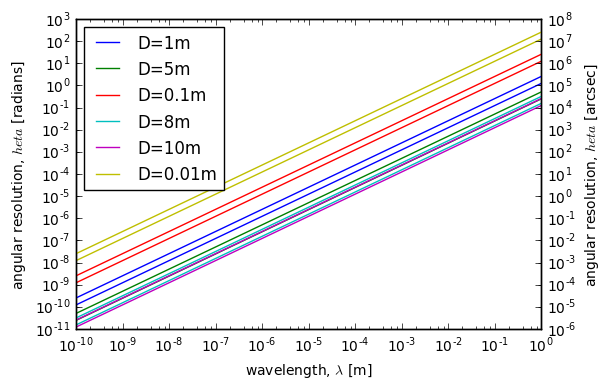

In [15]:
import matplotlib.pyplot as plt
import numpy as np

theta = {}
def resolution(lambda_,D):
    for i in D:
        theta[i]= []
        for j in lambda_:
            theta[i].append(1.22*j/i)
    return theta

#1 cm ~ human eye to 10 m ~ modern telescope diameter
#diameters = np.linspace(.01,10,0.1000)
diameters = [0.01, .1, 1, 5, 8, 10]

#x-ray to radio
wavelengths = np.linspace(1e-10,1,1000)

thetas = resolution(wavelengths, diameters)

#fig, ax = plt.subplots(nrows=len(diameters)//2, ncols=2, figsize=(10,8))
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
for key in thetas:
    #in radian
    ax1.plot(wavelengths, thetas[key], label='D={}m'.format(str(key)))
    #in arcsec
    ax2.plot(wavelengths, np.dot(thetas[key],206264.806), label='D={}m'.format(str(key)))

ax1.set_ylabel('angular resolution, $\theta$ [radians]')
ax1.set_xlabel('wavelength, $\lambda$ [m]')
ax2.set_ylabel('angular resolution, $\theta$ [arcsec]')
plt.legend(loc='best')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax2.set_xscale('log')
ax2.set_yscale('log')
plt.show()

# Variance

# Standard Deviation

# Confidence Intervals

# (Pearson's) $\chi^2$ Test 
A chi-squared test, also written as $\chi^2$ test, is any statistical hypothesis test wherein the sampling distribution of the test statistic is a chi-squared distribution when the null hypothesis is true.

In [2]:
from scipy.stats import chisquare
#When just f_obs is given, it is assumed that the expected frequencies are uniform and given by the mean of the observed frequencies.
chisquare([16, 18, 16, 14, 12, 12])

Power_divergenceResult(statistic=2.0, pvalue=0.84914503608460956)

In [3]:
#With f_exp the expected frequencies can be given.
chisquare([16, 18, 16, 14, 12, 12], f_exp=[16, 16, 16, 16, 16, 8])

Power_divergenceResult(statistic=3.5, pvalue=0.62338762774958223)

In [6]:
import numpy as np
#When f_obs is 2-D, by default the test is applied to each column.
obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
obs

array([[16, 32],
       [18, 24],
       [16, 16],
       [14, 28],
       [12, 20],
       [12, 24]])

In [7]:
chisquare(obs)

Power_divergenceResult(statistic=array([ 2.        ,  6.66666667]), pvalue=array([ 0.84914504,  0.24663415]))

In [10]:
#By setting axis=None, the test is applied to all data in the array, which is equivalent to applying the test to the flattened array.
chisquare(obs, axis=None)

Power_divergenceResult(statistic=23.31034482758621, pvalue=0.015975692534127565)

In [9]:
chisquare(obs.ravel())

Power_divergenceResult(statistic=23.310344827586206, pvalue=0.015975692534127579)

In [11]:
#ddof is the change to make to the default degrees of freedom.
chisquare([16, 18, 16, 14, 12, 12], ddof=1)

Power_divergenceResult(statistic=2.0, pvalue=0.73575888234288467)

In [12]:
#The calculation of the p-values is done by broadcasting the chi-squared statistic with ddof.
chisquare([16, 18, 16, 14, 12, 12], ddof=[0,1,2])

Power_divergenceResult(statistic=2.0, pvalue=array([ 0.84914504,  0.73575888,  0.5724067 ]))

In [13]:
#f_obs and f_exp are also broadcast. In the following, f_obs has shape (6,) and f_exp has shape (2, 6), so the result of broadcasting f_obs and f_exp has shape (2, 6). To compute the desired chi-squared statistics, we use axis=1:
chisquare([16, 18, 16, 14, 12, 12],
          f_exp=[[16, 16, 16, 16, 16, 8], [8, 20, 20, 16, 12, 12]],
          axis=1)

Power_divergenceResult(statistic=array([ 3.5 ,  9.25]), pvalue=array([ 0.62338763,  0.09949846]))

# Minimum chi-square estimation
Minimum chi-square estimation is a method of estimation of unobserved quantities based on observed data. In certain chi-square tests, one rejects a null hypothesis about a population distribution if a specified test statistic is too large, when that statistic would have approximately a chi-square distribution if the null hypothesis is true. In minimum chi-square estimation, one finds the values of parameters that make that test statistic as small as possible.


In [20]:
value = range(10)
np.random.poisson(10,20)

array([ 9,  9,  4, 10, 17, 17, 10,  8,  8, 15,  6, 11,  8, 15,  6,  7,  7,
        9, 16, 10])

In [21]:
np.random.poisson?

# Maximum Likelihood Estimation (MLE)

In statistics, maximum likelihood estimation (MLE) is a method of estimating the parameters of a statistical model given observations, by finding the parameter values that maximize the likelihood of making the observations given the parameters. MLE can be seen as a special case of the maximum a posteriori estimation (MAP) that assumes a uniform prior distribution of the parameters, or as a variant of the MAP that ignores the prior and which therefore is unregularized.[citation needed]

The method of maximum likelihood corresponds to many well-known estimation methods in statistics. For example, one may be interested in the heights of adult female penguins, but be unable to measure the height of every single penguin in a population due to cost or time constraints. Assuming that the heights are normally distributed with some unknown mean and variance, the mean and variance can be estimated with MLE while only knowing the heights of some sample of the overall population. MLE would accomplish this by taking the mean and variance as parameters and finding particular parametric values that make the observed results the most probable given the model.

In general, for a fixed set of data and underlying statistical model, the method of maximum likelihood selects the set of values of the model parameters that maximizes the likelihood function. Intuitively, this maximizes the "agreement" of the selected model with the observed data, and for discrete random variables it indeed maximizes the probability of the observed data under the resulting distribution. Maximum likelihood estimation gives a unified approach to estimation, which is well-defined in the case of the normal distribution and many other problems.

# Covariance
-the property of a function of retaining its form when the variables are linearly transformed.
-the mean value of the product of the deviations of two variates from their respective means

# Terms
* angular resolution
* Strehl ratio
* throughput
* bandwidth

# PSF and FWHM

# Noise
* Gaussian noise
* Poisson noise
* S/R
* Nyquist sampling

# Coronagraphs
* Phase-induced Amplitude Apodization (PIAA)
* Vortex

# Integral Field Spectrographs
* fiber-fed
* image slicer

# Poisson Distribution
The Poisson distribution is the limit of the binomial distribution for large N.

Possion distribution is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time and/or space if these events occur with a known average rate and independently of the time since the last event.[1] The Poisson distribution can also be used for the number of events in other specified intervals such as distance, area or volume.

For instance, an individual keeping track of the amount of mail they receive each day may notice that they receive an average number of 4 letters per day. If receiving any particular piece of mail doesn't affect the arrival times of future pieces of mail, i.e., if pieces of mail from a wide range of sources arrive independently of one another, then a reasonable assumption is that the number of pieces of mail received per day obeys a Poisson distribution.[2] Other examples that may follow a Poisson: the number of phone calls received by a call center per hour or the number of decay events per second from a radioactive source.